## Question #1 (50 points)

***This question consists of plotting and a conceptual question. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for anharmonically coupled oscillators, create a figure that superimposes

* a contour plot of the potential energy, and;
* the trajectory of $Q_1$ and $Q_2$.

### Point breakdown

* Contour plot (20 points)
* Trajectory plot (20 points)
* Physical explanation (10 points)

### The potential energy

$$ \Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2 $$

### Constrained parameters and initial conditions

Take $K_1 = 1$, $K_2 = 0.2$, $M_1 = M_2 = 1$, and $C=0.5$. For the initial conditions, take $Q_1(0) = 0$, $Q_2(0) = 1$, and both velocities starting at zero.

### Plotting constraints
Plot $Q_1$ and $Q_2$ on the horizontal and vertical axes, respectively. I suggest a meshgrid of at least $100 \times 100$ points.

For your contour plot, combine `plt.contour` and `plt.contourf` with code similar to the following:

* `plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='viridis')`
* `plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)`

Also, use `plt.xlim(-1.5, 1.5)` and `plt.ylim(-1.5, 1.5)`

Don't forget to label your axes.

### Getting and plotting the trajectory

To get the trajectory, you will need to set up and solve the equations of motion, as we did in previous homework and in class. Then you can plot $Q_2$ versus $Q_1$ with `matplotlib` using a line of code similar to `plt.plot(Q1, Q2, color='red', label="Trajectory")`.

Plot the trajectory from $t=0$ to $t=50$, with an appropriate choice of mesh points to ensure the trajectory is resolved. (e.g. `t_mesh = np.linspace(0, 50, 200)`)

### Physical explanation

With your code complete, you can test four cases for the initial conditions (all with the initial velocity set to zero):

1. $Q_1(0) = 0$, $Q_2(0) = 1$ (**submit this plot**)
2. $Q_1(0) = 0$, $Q_2(0) = -1$
3. $Q_1(0) = 1$, $Q_2(0) = 0$
4. $Q_1(0) = -1$, $Q_2(0) = 0$

Why do the dynamics differ when only $Q_1$ is initially displaced compared to when only $Q_2$ is initially displaced? How does this relate to the coupling term in the potential energy? What is the physical interpretation? You could use our cylindrical beam example from class to describe this, if you like.


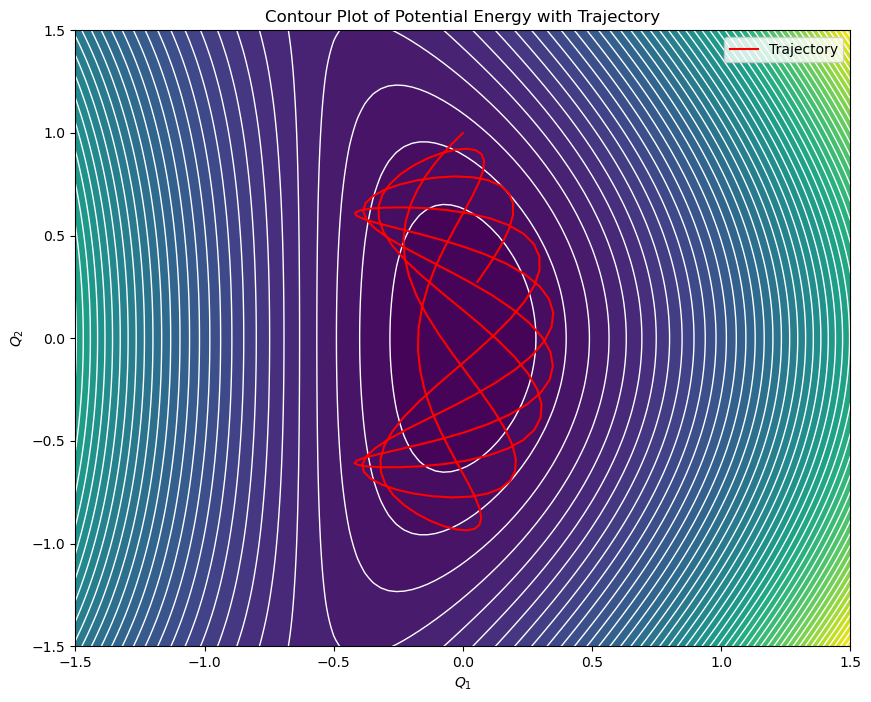

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define constants
K1, K2 = 1, 0.2  # Quadratic terms
C = 0.5 # Coupling term

t_mesh = np.linspace(0, 50, 200)  # Time range for integration

# Define potential energy function
def potential_energy(Q1, Q2):
    return (0.5 * K1 * Q1**2 + 0.5 * K2 * Q2**2 +
            1/3 * C * Q1 * Q2**2)

# Define force components 
def force_Q1(Q1, Q2):
    return -K1 * Q1 - 1/3 * C  * Q2**2 

def force_Q2(Q1, Q2):
    return -K2 * Q2 - 2/3 * C * Q2 * Q1

# Define system of first-order ODEs
def equations_of_motion(t, y):
    Q1, Q2, dQ1dt, dQ2dt = y
    d2Q1dt2 = force_Q1(Q1, Q2)
    d2Q2dt2 = force_Q2(Q1, Q2)
    return [dQ1dt, dQ2dt, d2Q1dt2, d2Q2dt2]

# Create a meshgrid for Q1 and Q2
Q1_grid = np.linspace(-1.5, 1.5, 100)
Q2_grid = np.linspace(-1.5, 1.5, 100)
Q1_mesh, Q2_mesh = np.meshgrid(Q1_grid, Q2_grid)

# Calculate potential energy on the grid
U_grid = potential_energy(Q1_mesh, Q2_mesh)

# Plot contour of potential energy
plt.figure(figsize=(10, 8))
plt.contourf(Q1_mesh, Q2_mesh, U_grid, levels=50, cmap='viridis')
plt.contour(Q1_mesh, Q2_mesh, U_grid, levels=50, colors='white', linewidths=1)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel("$Q_1$")
plt.ylabel("$Q_2$")
plt.title("Contour Plot of Potential Energy with Trajectory")

# Initial conditions for trajectory
initial_conditions = [0, 1, 0.0, 0.0]  # Q1, Q2, dQ1/dt, dQ2/dt

# Solve equations of motion
sol = solve_ivp(equations_of_motion, [0, 50], initial_conditions, t_eval=t_mesh)

# Extract trajectory
Q1_trajectory = sol.y[0]
Q2_trajectory = sol.y[1]

# Plot trajectory on contour plot
plt.plot(Q1_trajectory, Q2_trajectory, color='red', label="Trajectory")
plt.legend()
plt.show()
